In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.spatial.distance as dt
import scipy.stats as stats

from icecream import ic

In [22]:
group_means = np.array([[-6.0, -1.0],
                        [-3.0, +2.0],
                        [+3.0, +2.0],
                        [+6.0, -1.0]])

group_covariances = np.array([[[+0.4, +0.0],
                               [+0.0, +4.0]],
                              [[+2.4, -2.0],
                               [-2.0, +2.4]],
                              [[+2.4, +2.0],
                               [+2.0, +2.4]],
                              [[+0.4, +0.0],
                               [+0.0, +4.0]]])

# read data into memory
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",")

# get X values
X = data_set[:, [0, 1]]

# set number of clusters
K = 4

In [23]:
def generate_split_list(X, means):
    for x in X:
        # Euclidean distance
        distances = dt.cdist(np.array([x]), means, 'euclidean')
        cluster_index = np.argmin(distances)
        yield cluster_index

In [24]:
def get_y_hat(X, means):
    return np.array(list(generate_split_list(X, means)))

In [25]:
def get_parameters(X, K, old_means):

    # Take up to K means
    means = np.array(old_means[:K])

    # Split the data according to the means
    y_hat = get_y_hat(X, means)
    N = len(y_hat)

    # Calculate the prior probability for each cluster
    priors = np.array([(y_hat == c).sum() for c in range(K)]) / N


    # Calculate the covariance matrix for each cluster
    covariances = [np.cov(X[y_hat == c].T) for c in range(K)]

    
    # your implementation ends above
    return(means, covariances, priors)
get_parameters(X, K, group_means)

(array([[-6., -1.],
        [-3.,  2.],
        [ 3.,  2.],
        [ 6., -1.]]),
 [array([[0.45376075, 0.1197836 ],
         [0.1197836 , 3.13985534]]),
  array([[ 2.82799595, -1.78007052],
         [-1.78007052,  2.03799917]]),
  array([[2.62943319, 1.81673512],
         [1.81673512, 2.27289789]]),
  array([[0.36023944, 0.02945858],
         [0.02945858, 3.38022183]])],
 array([0.227, 0.275, 0.269, 0.229]))

In [26]:
# STEP 2
# should return initial parameter estimates
# as described in the homework description
def initialize_parameters(X, K):
    # your implementation starts below
    initial_means = np.genfromtxt("hw05_initial_centroids.csv", delimiter = ",")
    (means, covariances, priors) = get_parameters(X, K, initial_means)
    
    # your implementation ends above
    return(means, covariances, priors)




In [27]:
# STEP 3
# should return final parameter estimates of
# EM clustering algorithm
def em_clustering_algorithm(X, K, means, covariances, priors, iterations=100):
    # your implementation starts below
    assert not (len(means) > K)
    if len(means) < K:
        print("Warning: Number of means is not equal to K. Using means up to K.")
        means = means[:K]

    assignments = get_y_hat(X, means)
    for _ in range(iterations):
        # Calculate the means of updated points in each cluster
        updated_means = []
        for c in range(K):
            updated_means.append(X[assignments==c].mean(axis=0))

        # Get new parameters
        means, covariances, priors = get_parameters(X, K, updated_means)

        # Assign each point to the cluster with the closest mean
        assignments = get_y_hat(X, means)

    # your implementation ends above
    return(means, covariances, priors, assignments)



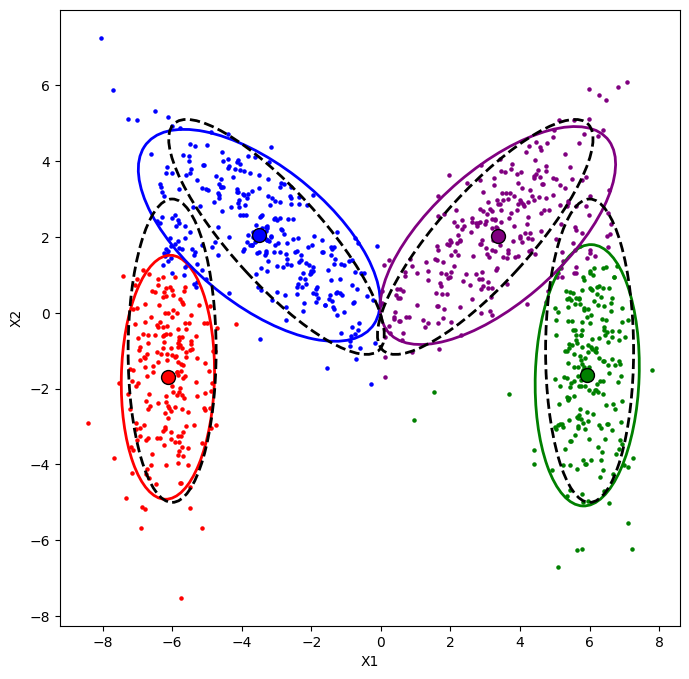

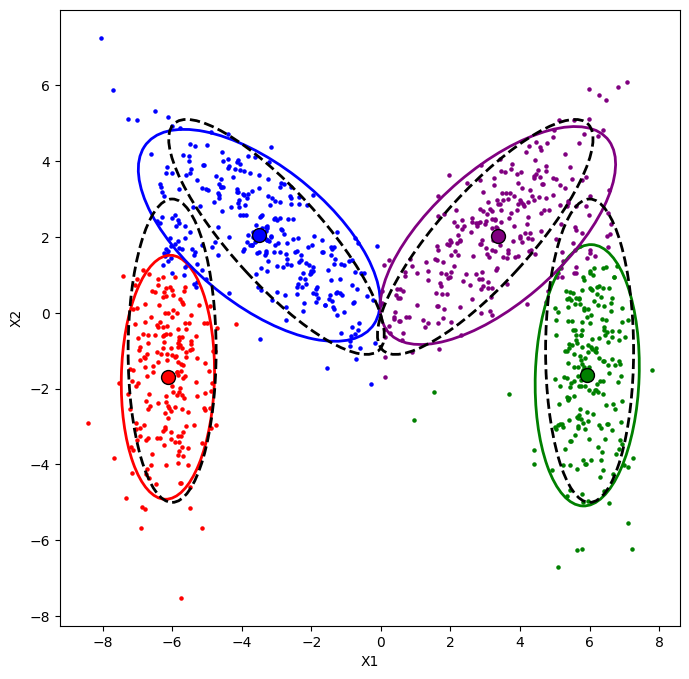

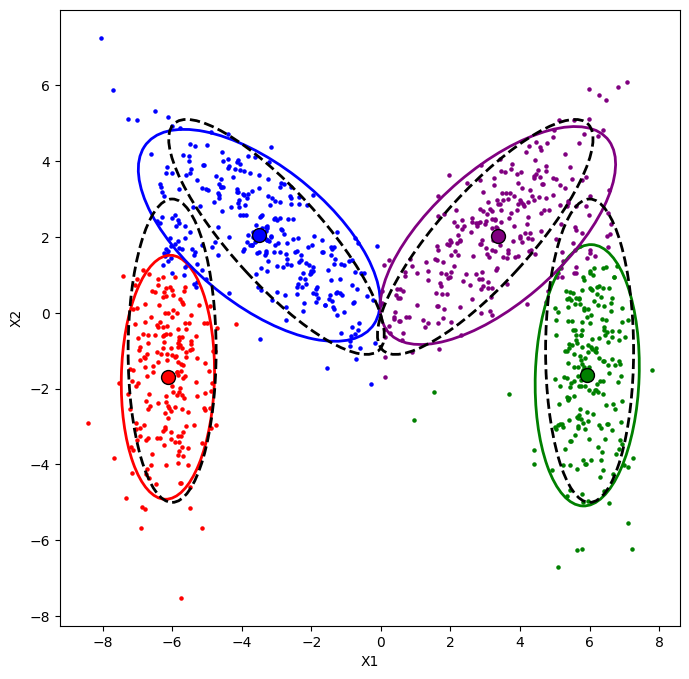

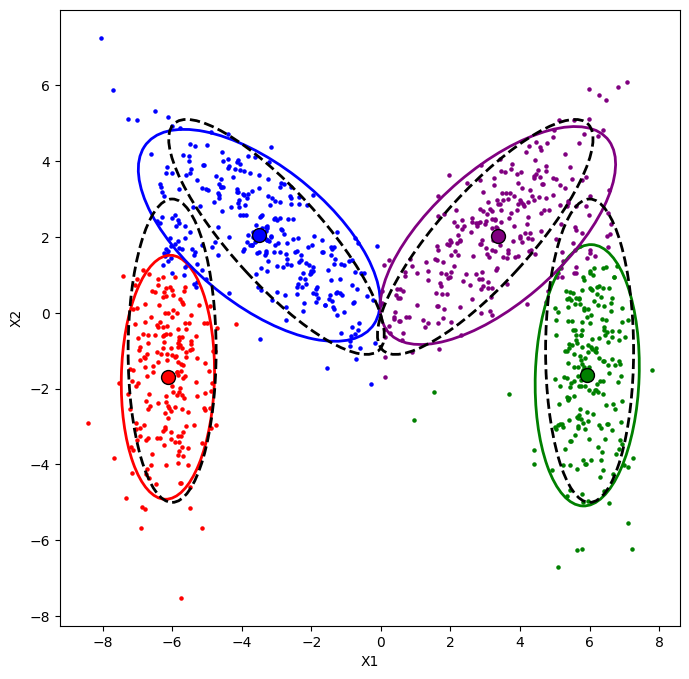

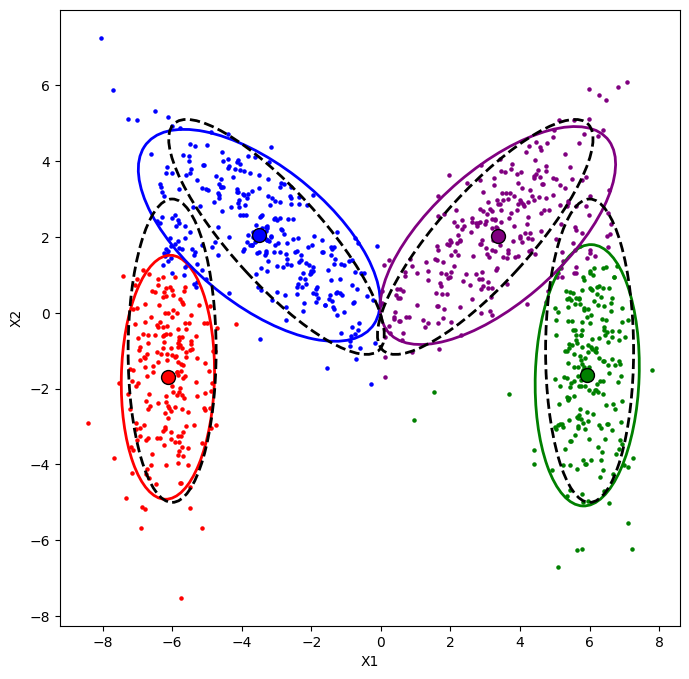

In [32]:
# STEP 4
# should draw EM clustering results as described
# in the homework description
def draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments):
    # your implementation starts below
    from matplotlib.patches import Ellipse
    scale_factor = 4
    plt.figure(figsize=(8, 8))
    colors = ['red', 'blue', 'green', 'purple']
    for k in range(K):
        plt.scatter(X[assignments == k, 0], X[assignments == k, 1], c=colors[k], s=5)
    for mean, color in zip(means, colors):
        plt.scatter(mean[0], mean[1], c=color, s=100, edgecolors='k')

    for mean, cov, color in zip(means, covariances, colors):
        eigenvalues, eigenvectors = linalg.eig(cov)
        angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
        width, height = scale_factor * np.sqrt(eigenvalues) 
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle, 
                      edgecolor=color, lw=2, facecolor='none')
        plt.gca().add_artist(ell)

    # Plot the true means and covariances
    for mean, cov in zip(group_means, group_covariances):
        eigenvalues, eigenvectors = linalg.eig(cov)
        angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
        width, height = scale_factor * np.sqrt(eigenvalues) 
        ell = Ellipse(xy=mean, width=width, height=height, angle=angle, 
                      edgecolor="black", lw=2, facecolor='none', linestyle='dashed')
        plt.gca().add_artist(ell)

    plt.xlabel('X1')
    plt.ylabel('X2')    
    
    # your implementation ends above

for iterations in range(95, 100):
    means, covariances, priors = initialize_parameters(X, K)
    means, covariances, priors, assignments = em_clustering_algorithm(X, K, means, covariances, priors, iterations) 
    draw_clustering_results(X, K, group_means, group_covariances, means, covariances, assignments)